# 1. Load Modules and Data

In [2]:
# numpy and pandas for data manipulation\
# !pip install --upgrade numpy==1.10.1
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os
import seaborn as sns
color = sns.color_palette()

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install cufflinks
#!pip install --upgrade seaborn
import cufflinks as cf
cf.go_offline()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# !pip install scorecardpy
import scorecardpy as sc
import pprint 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [50]:
#Load application data and bureau data into a dataframe
application_df = pd.read_csv('IS453 Group Assignment - Application Data.csv')
bureau_df = pd.read_csv('IS453 Group Assignment - Bureau Data.csv')

In [51]:
print("bureau_df shape: ",bureau_df.shape)
print("application_df shape: ",application_df.shape)

print("\n")
print("application_df info: ",bureau_df.info(verbose=True, show_counts=True))
print("\n")
print("application_df info: ",application_df.info(verbose=True, show_counts=True))

bureau_df shape:  (1048575, 17)
application_df shape:  (257999, 120)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1048575 non-null  int64  
 1   SK_ID_BUREAU            1048575 non-null  int64  
 2   CREDIT_ACTIVE           1048575 non-null  object 
 3   CREDIT_CURRENCY         1048575 non-null  object 
 4   DAYS_CREDIT             1048575 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1048575 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     983456 non-null   float64
 7   DAYS_ENDDATE_FACT       659267 non-null   float64
 8   AMT_CREDIT_MAX_OVERDUE  357740 non-null   float64
 9   CNT_CREDIT_PROLONG      1048575 non-null  int64  
 10  AMT_CREDIT_SUM          1048568 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     891240 non-null   float64
 12  AMT_CREDIT_SUM_LIMIT    683513 non-null  

In [52]:
#aggregate bureau data
bureau_data = bureau_df.copy()
print(bureau_data['CREDIT_CURRENCY'].unique())
print(bureau_data['CREDIT_TYPE'].unique())

currency_mapping = {
    'currency 1': 1,
    'currency 2': 2,
    'currency 3': 3,
    'currency 4': 4
}

bureau_data['CREDIT_CURRENCY'] = bureau_data['CREDIT_CURRENCY'].map(currency_mapping)
bureau_data = pd.get_dummies(bureau_data, columns=['CREDIT_TYPE'], prefix='CREDIT_TYPE')

# Step 3: Display the resulting DataFrame
print(bureau_data.head())

print(bureau_data.columns)
# print(bureau_data.head)

['currency 1' 'currency 2' 'currency 4' 'currency 3']
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed                1         -497   
1      215354       5714463        Active                1         -208   
2      215354       5714464        Active                1         -203   
3      215354       5714465        Active                1         -203   
4      215354       5714466        Active                1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   


In [53]:
# # Load your dataset (replace with your actual file path)
# data = bureau_data.copy()

# # Define aggregation functions
# aggregation_functions = {
#     'SK_ID_BUREAU': 'first', 
#     'CREDIT_ACTIVE': lambda x: x.mode()[0],  # Most common value
#     'CREDIT_CURRENCY': lambda x: x.mode()[0],  # Most common currency
#     'DAYS_CREDIT': 'mean',  # Average days of credit
#     'CREDIT_DAY_OVERDUE': 'sum',  # Total overdue days
#     'DAYS_CREDIT_ENDDATE': 'max',  # Latest end date
#     'DAYS_ENDDATE_FACT': 'min',  # Earliest end date for closed credits
#     'AMT_CREDIT_MAX_OVERDUE': 'max',  # Maximum overdue amount
#     'CNT_CREDIT_PROLONG': 'sum',  # Total prolongations
#     'AMT_CREDIT_SUM': 'sum',  # Total credit amount
#     'AMT_CREDIT_SUM_DEBT': 'sum',  # Total debt amount
#     'AMT_CREDIT_SUM_LIMIT': 'sum',  # Total limit amount
#     'AMT_CREDIT_SUM_OVERDUE': 'sum',  # Total overdue amounts
#     'DAYS_CREDIT_UPDATE': 'min',  # Earliest update date
#     'AMT_ANNUITY': 'mean'  # Average annuity payment
# }

# # Include one-hot encoded CREDIT_TYPE columns in aggregation
# credit_type_columns = [col for col in data.columns if col.startswith('CREDIT_TYPE_')]
# for col in credit_type_columns:
#     aggregation_functions[col] = 'sum'  # Sum for one-hot encoded columns

# # Step 2: Group by SK_ID_CURR and apply aggregation functions, retaining SK_ID_CURR in output
# aggregated_data = data.groupby('SK_ID_CURR').agg(aggregation_functions).reset_index()

# # Step 2: Display or save the aggregated DataFrame
# print(aggregated_data.shape)  # Display the first few rows of aggregated data

# # # Optionally, save the aggregated DataFrame to a new CSV file
# # aggregated_data.to_csv('aggregated_bureau_data.csv')


# uncomment the above to run, else import aggregated bureau data from the indicated file
aggregated_data = pd.read_csv('aggregated_bureau_data.csv')
aggregated_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100001,5896630,Closed,1,-735.000000,0,1778.0,-1328.0,NaN,0,1453365.000,596686.5,0.000,0.0,-155,3545.357143,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
1,100002,6158904,Closed,1,-817.833333,0,85.0,-1185.0,5043.645,0,347555.565,0.0,31988.565,0.0,-1185,0.000000,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0
2,100003,5885877,Closed,1,-1400.750000,0,1216.0,-2131.0,0.000,0,1017400.500,0.0,810000.000,0.0,-2131,NaN,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0
3,100004,6829133,Closed,1,-867.000000,0,-382.0,-683.0,0.000,0,189037.800,0.0,0.000,0.0,-682,NaN,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4,100008,6491433,Active,1,-587.500000,0,471.0,-1028.0,0.000,0,373311.000,240057.0,0.000,0.0,-1027,NaN,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [54]:
#merge applications with matching SK_ID_CURR with bureau request
data = application_df.merge(aggregated_data, on='SK_ID_CURR', how='left')
data['DEBT_TO_INCOME_RATIO'] = (data['AMT_ANNUITY_x']) / data['AMT_INCOME_TOTAL']
print(data.head())
print(data.shape)
# we have 307511 rows, 151 columns

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
0               Y             0          202500.0    406597.5        24700.5   
1               N             0          270000.0   1293502.5        35698.5   
2               Y             0           67500.0    135000.0         6750.0   
3               Y             0          135000.0    312682.5        29686.5   
4               Y             0          121500.0    513000.0        21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Worki

Criteria matching
-

We now filter records by finding those that match our criteria.
Before we continue, lets see what insight we can derive from our data first

Mean Age: 43.92 years
Median Age: 43.13 years
Standard Deviation of Age: 11.96 years


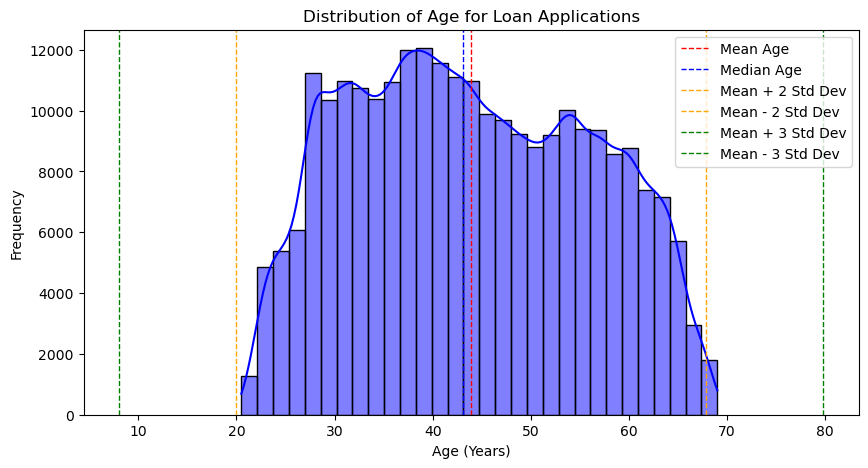

In [55]:
# first, lets look at the age distribution of our applicants
data_copy = data.copy()

# Calculating age in years
data_copy['AGE_YEARS'] = -data_copy['DAYS_BIRTH'] / 365.25  # Convert days to years

# Calculate mean and standard deviation of age
median_age = data_copy['AGE_YEARS'].median()
mean_age = data_copy['AGE_YEARS'].mean()
std_dev_age = data_copy['AGE_YEARS'].std()

# mean and standard deviation
print(f"Mean Age: {mean_age:.2f} years")
print(f"Median Age: {median_age:.2f} years")
print(f"Standard Deviation of Age: {std_dev_age:.2f} years")

# Visualize the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(data_copy['AGE_YEARS'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age for Loan Applications')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.axvline(median_age, color='blue', linestyle='dashed', linewidth=1, label='Median Age')
plt.axvline(mean_age + 2 * std_dev_age, color='orange', linestyle='dashed', linewidth=1, label='Mean + 2 Std Dev')
plt.axvline(mean_age - 2 * std_dev_age, color='orange', linestyle='dashed', linewidth=1, label='Mean - 2 Std Dev')
plt.axvline(mean_age + 3 * std_dev_age, color='green', linestyle='dashed', linewidth=1, label='Mean + 3 Std Dev')
plt.axvline(mean_age - 3 * std_dev_age, color='green', linestyle='dashed', linewidth=1, label='Mean - 3 Std Dev')
plt.legend()
plt.show()

# Identify ages that are 2-3 standard deviations away from the mean
lower_bound_2_std = mean_age - 2 * std_dev_age
upper_bound_2_std = mean_age + 2 * std_dev_age
lower_bound_3_std = mean_age - 3 * std_dev_age
upper_bound_3_std = mean_age + 3 * std_dev_age

We found the median age a person starts a business to be 28 in Singapore. Considering the increasing trend of young entrepreneurs, we will also consider 18 year olds as a valid target audience. 
In order to ensure a reasonable sample size, we will set the upper bound for this criteria to be 2 standard deviations from our intended median (28+11.95*1.5 = ~46 years old)

In [56]:
# Now, lets define some conditions to narrow down what constitutes a small business loan

print ("income sources: ",data['NAME_INCOME_TYPE'].unique())
print ("occupation types: ",data['OCCUPATION_TYPE'].unique())
print ("contract types: ",data['NAME_CONTRACT_TYPE'].unique())

income sources:  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
occupation types:  ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
contract types:  ['Cash loans' 'Revolving loans']


Of these, only pensioners come across as least likely to start a small business.
We would also want to be wary of unemployed workers, as they may lack the income stability to properly pay off their loan putting them at higher risk of default.

To consider this, lets take a brief look at the distribution of unemployed applicants

In [57]:
unemployed = data[data['NAME_INCOME_TYPE'] == 'Unemployed']
print(unemployed.describe())
print(unemployed['TARGET'].value_counts(normalize=True))

          SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count      20.000000  20.000000     20.000000         20.000000  2.000000e+01   
mean   236641.500000   0.400000      0.200000     109215.000000  7.733250e+05   
std     93266.320017   0.502625      0.523148      92392.295902  4.344559e+05   
min    101358.000000   0.000000      0.000000      26550.000000  1.350000e+05   
25%    147093.000000   0.000000      0.000000      51750.000000  5.557500e+05   
50%    219710.500000   0.000000      0.000000      65250.000000  6.345000e+05   
75%    338325.250000   1.000000      0.000000     135000.000000  9.348750e+05   
max    375382.000000   1.000000      2.000000     337500.000000  1.804500e+06   

       AMT_ANNUITY_x  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count      20.000000     2.000000e+01                   20.000000   
mean    27621.225000     7.733250e+05                    0.021169   
std     13339.239965     4.344559e+05                    0.0148

There are only 22 of them, of which ~36% defaulted on their loan.
Due to the small sample size, and majority of it being non-event, there is not much basis for discrimination, and hence we will include it in our data set.

For now, lets filter based on these criterias

In [58]:
data_copy = data.copy()

# We only want to look at applications where applicant is likely to be able to start a business
min_age_days = 18 * 365  # Minimum age of 18 years
max_age_days = 46 * 365  # Maximum age of 46 years, so as to capture a decent anmount of the population

data_copy = data_copy[(data['DAYS_BIRTH'] <= -min_age_days) & (data['DAYS_BIRTH'] >= -max_age_days)]

# Subsequently, we'd like to filter based on income type. We will only remove pensioners, as 
# we assume the rest to be capable of starting a business as well

income_source = ['Working', 'State servant', 'Commercial associate', 'Unemployed',
 'Student', 'Businessman' ,'Maternity leave']

data_copy = data_copy[data['NAME_INCOME_TYPE'].isin(income_source)]


In [59]:
print("Before processing: ",application_df.shape[0])
print("After processing: ",data_copy.shape[0])
print("-------------------------------------------------------------------")
print("Before processing: ",application_df['TARGET'].value_counts(normalize=False))
print("After processing: ",data_copy['TARGET'].value_counts(normalize=False))
print("-------------------------------------------------------------------")
print("Before processing: ",application_df['TARGET'].value_counts(normalize=True))
print("After processing: ",data_copy['TARGET'].value_counts(normalize=True))

Before processing:  257999
After processing:  146330
-------------------------------------------------------------------
Before processing:  TARGET
0    237094
1     20905
Name: count, dtype: int64
After processing:  TARGET
0    132304
1     14026
Name: count, dtype: int64
-------------------------------------------------------------------
Before processing:  TARGET
0    0.918973
1    0.081027
Name: proportion, dtype: float64
After processing:  TARGET
0    0.904148
1    0.095852
Name: proportion, dtype: float64


In [60]:
# next, we proceed to look at our columns

numeric_columns = data_copy.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns: ",numeric_columns)
print(len(numeric_columns))



Numeric Columns:  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE

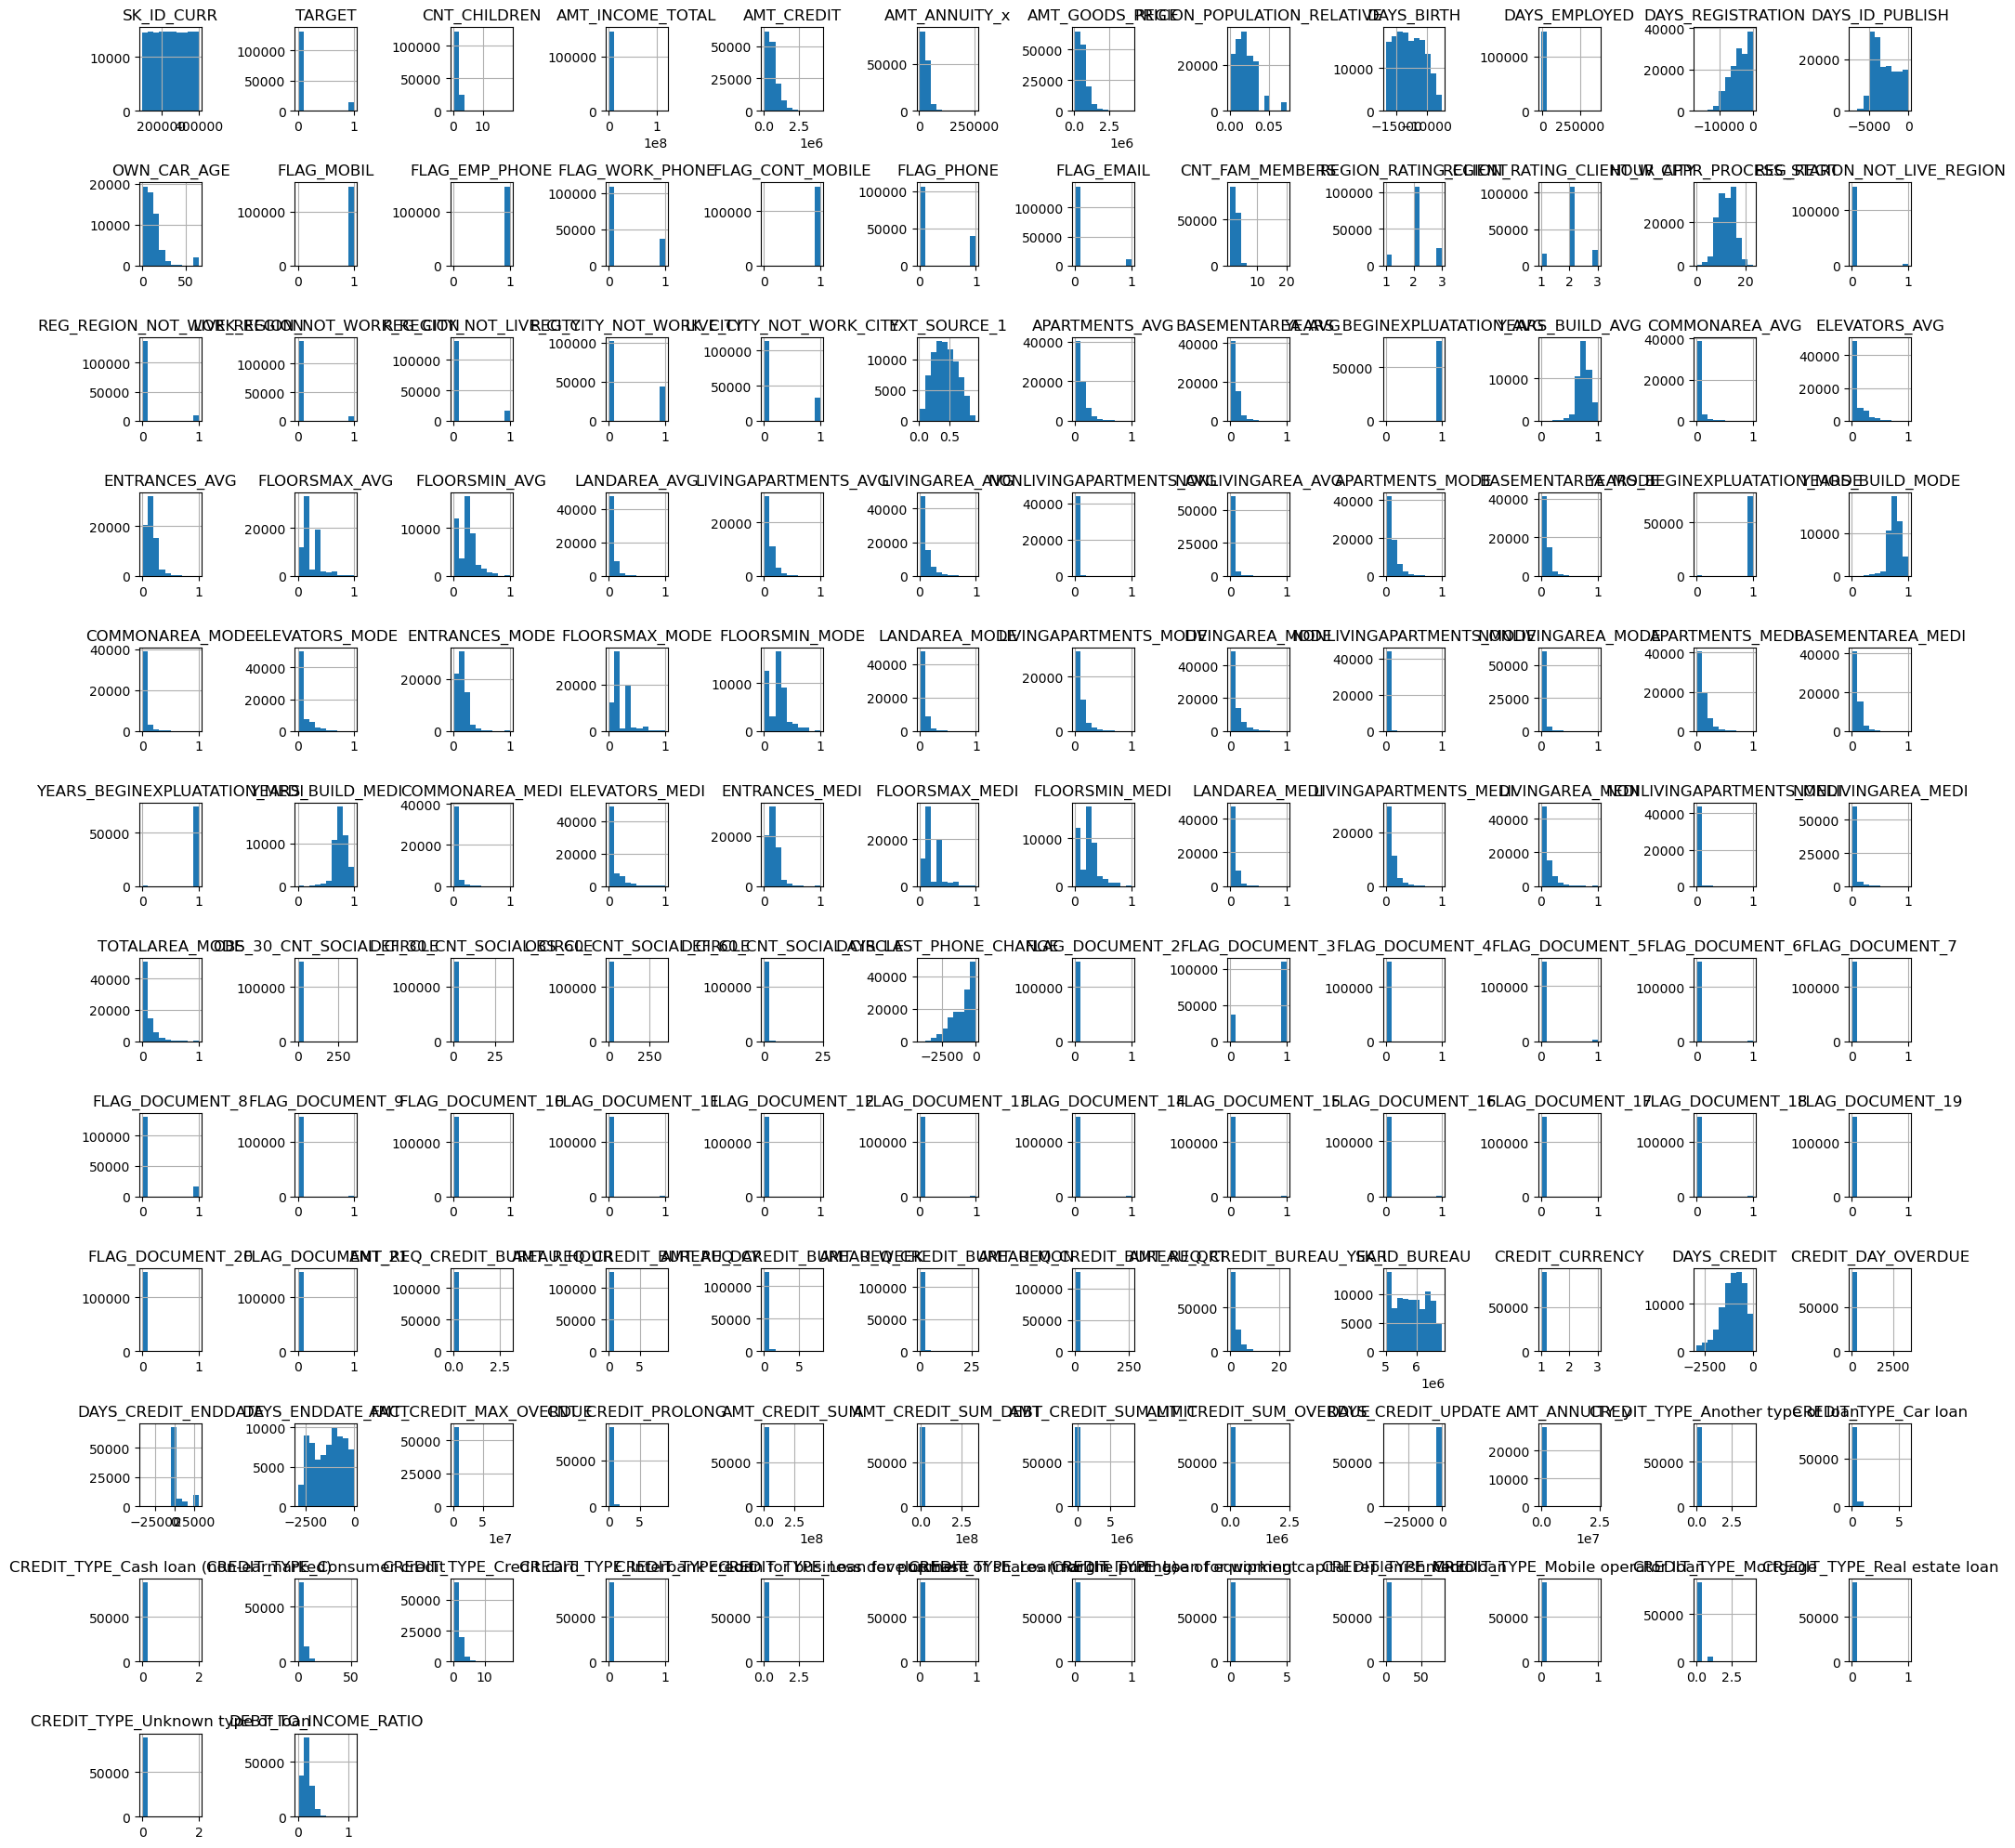

In [61]:
data_copy[numeric_columns].hist(figsize=(20,20))
plt.tight_layout()

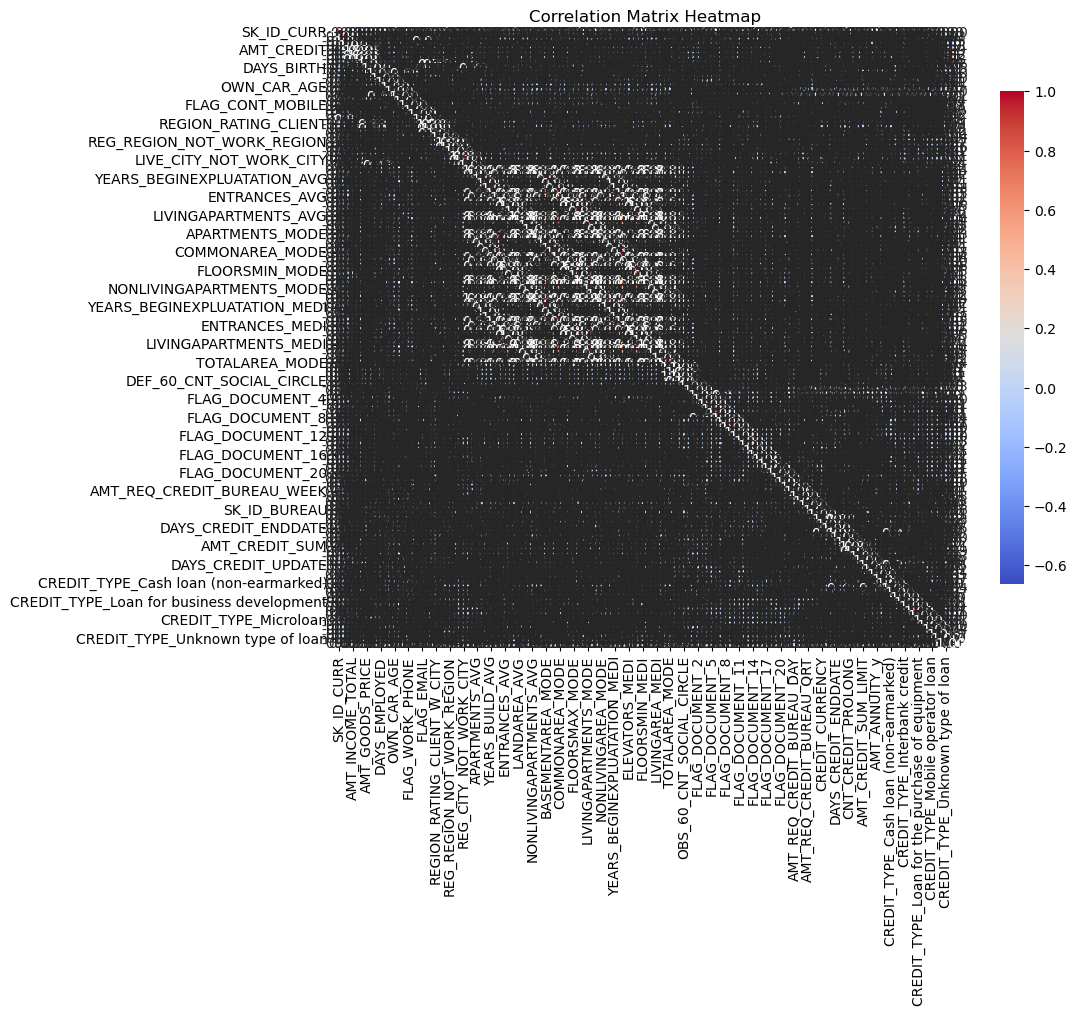

Correlation with TARGET:
TARGET                         1.000000
DAYS_CREDIT                    0.083322
REGION_RATING_CLIENT_W_CITY    0.071460
REGION_RATING_CLIENT           0.069167
DAYS_LAST_PHONE_CHANGE         0.062813
                                 ...   
AMT_GOODS_PRICE               -0.051609
FLOORSMAX_MODE                -0.054666
FLOORSMAX_MEDI                -0.055828
FLOORSMAX_AVG                 -0.055908
EXT_SOURCE_1                  -0.154657
Name: TARGET, Length: 134, dtype: float64
Highly correlated pairs (threshold > 0.8):
('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('CNT_FAM_MEMBERS', 'CNT_CHILDREN')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION')
('LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION')
('APARTMENTS_AVG', 'ELEVATORS_AVG')
('APARTMENTS_AVG', 'LIVINGAPARTMENTS_A

In [62]:
# now, we look at the correlation to determine which variables we can drop
data = data_copy.copy()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Calculate the correlation matrix for numerical variables
correlation_matrix = data[numerical_cols].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 4: Analyze correlations with respect to the target variable (e.g., 'TARGET')
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=False)
print("Correlation with TARGET:")
print(target_correlation)

# Identify features with high correlation (e.g., above a threshold of 0.8)
threshold = 0.8
high_correlation_pairs = [(col1, col2) for col1 in numerical_cols for col2 in numerical_cols 
                          if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

print("Highly correlated pairs (threshold > {}):".format(threshold))
for pair in high_correlation_pairs:
    print(pair)

In [63]:
# based on business knowledge, we will drop variables that do not have a logical connection to predicting the target variable
# This includes variables realting to:
# 1. the number of children
# 2. the gender of the applicant
# 3. anything houseing related to the applicant

col_preserve= [
        'WEEKDAY_APPR_PROCESS_START',
        'HOUR_APPR_PROCESS_START',
    
]
columns_to_drop = [
    'NAME_TYPE_SUITE',
    'CODE_GENDER',
    'CNT_CHILDREN',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
]

data.drop(columns=columns_to_drop, inplace=True)
print(data.columns)
print(len(data.columns))

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       ...
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan',
       'CREDIT_TYPE_Unknown type of loan', 'DEBT_TO_INCOME_RATIO'],
      dtype='object', length=101)
101


In [ ]:
cols_with_na = pd.DataFrame((data.isnull().sum().sort_values(ascending=False)/data.shape[0])).applymap("{0:.0%}".format)

print(cols_with_na[0])

AMT_ANNUITY_y                 81%
OWN_CAR_AGE                   61%
AMT_CREDIT_MAX_OVERDUE        59%
DAYS_ENDDATE_FACT             49%
EXT_SOURCE_1                  46%
                             ... 
REG_CITY_NOT_LIVE_CITY         0%
REG_REGION_NOT_WORK_REGION     0%
REG_REGION_NOT_LIVE_REGION     0%
HOUR_APPR_PROCESS_START        0%
FLAG_DOCUMENT_11               0%
Name: 0, Length: 95, dtype: object


In [71]:
# drop columns missing more than 50% values
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / data.shape[0]) * 100

# Select columns with missing values exceeding 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index
print(columns_to_drop)
print(len(columns_to_drop))

Index([], dtype='object')
0


In [73]:
data.drop(columns=columns_to_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146330 entries, 0 to 257998
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                146330 non-null  int64  
 1   TARGET                                                    146330 non-null  int64  
 2   NAME_CONTRACT_TYPE                                        146330 non-null  object 
 3   FLAG_OWN_CAR                                              146330 non-null  object 
 4   FLAG_OWN_REALTY                                           146330 non-null  object 
 5   AMT_INCOME_TOTAL                                          146330 non-null  float64
 6   AMT_CREDIT                                                146330 non-null  float64
 7   AMT_ANNUITY_x                                             146322 non-null  float64
 8   NAME_INCO

#### Dropping rows

In [74]:
# drop rows based on a threshold value of more than 3 missing values
rows_three_missing = data[data.isnull().sum(axis=1) > 3].shape[0]
print('Percentage of all rows missing more than 3 values: ' + str("{:.1%}".format(rows_three_missing/data.shape[0])))

Percentage of all rows missing more than 3 values: 39.1%


In [75]:
merged_df_new1 = data.dropna(thresh=data.shape[1]-3)
merged_df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89124 entries, 0 to 257998
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SK_ID_CURR                                                89124 non-null  int64  
 1   TARGET                                                    89124 non-null  int64  
 2   NAME_CONTRACT_TYPE                                        89124 non-null  object 
 3   FLAG_OWN_CAR                                              89124 non-null  object 
 4   FLAG_OWN_REALTY                                           89124 non-null  object 
 5   AMT_INCOME_TOTAL                                          89124 non-null  float64
 6   AMT_CREDIT                                                89124 non-null  float64
 7   AMT_ANNUITY_x                                             89120 non-null  float64
 8   NAME_INCOME_TYPE    

In [ ]:
# we will now 

In [65]:
# Immediately, we can look to drop LIVE_CITY_NOT_WORK_CITY and LIVE_REGION_NOT_WORK_REGION. As this is a business loan,
# we will assume the registered location to be of importance as it pertains to the entity in question.
# We will also drop REGION_RATING_CLIENT, as we can use the higher correlated REGION_RATING_CLIENT_W_CITY (wrt. TARGET)
# in its place for better generalisation. Additionally, we will drop OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE 
# in favour of their more general 30 day variants with whom they share high correlation with
# Lastly, we will also drop AMT_GOODS_PRICE as it is not as relevant as amount credit given the context.

columns_to_drop = [
    'LIVE_CITY_NOT_WORK_CITY',
    'LIVE_REGION_NOT_WORK_REGION',
    'REGION_RATING_CLIENT',  # Dropping in favor of REGION_RATING_CLIENT_W_CITY
    'OBS_60_CNT_SOCIAL_CIRCLE',  # Dropping in favor of 30-day variants
    'DEF_60_CNT_SOCIAL_CIRCLE',   # Dropping in favor of 30-day variants
    'AMT_GOODS_PRICE'  # Not relevant in the context
]
data.drop(columns=columns_to_drop, inplace=True)


In [66]:
# Now, lets define some conditions to narrow down what constitutes a small business loan

print (data['NAME_INCOME_TYPE'].unique())
print (data['OCCUPATION_TYPE'].unique())
print (data['NAME_CONTRACT_TYPE'].unique())

['Working' 'State servant' 'Commercial associate' 'Unemployed' 'Student'
 'Businessman' 'Maternity leave']
['Laborers' 'Core staff' 'Accountants' 'Drivers' 'Sales staff' nan
 'Private service staff' 'Managers' 'Low-skill Laborers' 'Medicine staff'
 'Realty agents' 'Secretaries' 'High skill tech staff'
 'Waiters/barmen staff' 'Cooking staff' 'Security staff' 'Cleaning staff'
 'IT staff' 'HR staff']
['Cash loans' 'Revolving loans']


          SK_ID_CURR         TARGET  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  146330.000000  146330.000000      1.463300e+05  1.463300e+05   
mean   249395.085136       0.095852      1.748385e+05  5.842852e+05   
std     86204.485916       0.294389      3.274560e+05  3.960465e+05   
min    100002.000000       0.000000      2.700000e+04  4.500000e+04   
25%    174646.250000       0.000000      1.125000e+05  2.700000e+05   
50%    249452.000000       0.000000      1.575000e+05  4.959855e+05   
75%    324341.000000       0.000000      2.025000e+05  7.975575e+05   
max    398562.000000       1.000000      1.170000e+08  4.050000e+06   

       AMT_ANNUITY_x  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count  146322.000000               146330.000000  146330.000000   
mean    27351.579499                    0.020539  -12795.074059   
std     14536.720230                    0.013704    2349.109558   
min      2187.000000                    0.000290  -16790.000000   
25%     16682.625000     

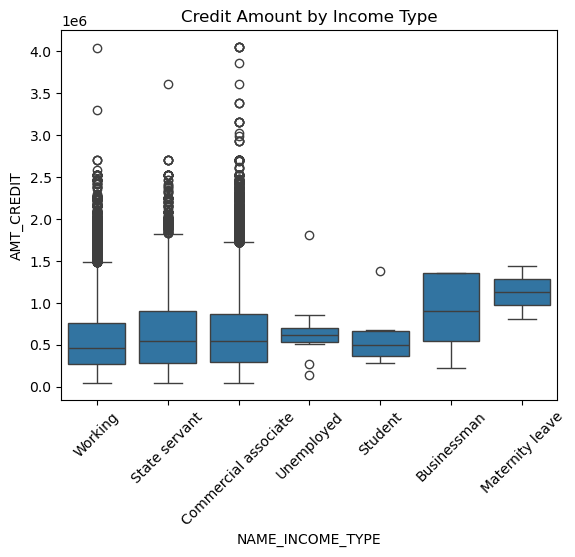

In [67]:
# Descriptive statistics
print(data.describe())

# Visualizations

sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=data)
plt.title('Credit Amount by Income Type')
plt.xticks(rotation=45)
plt.show()